In [1]:
from ctgan import CTGAN
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
from table_evaluator import TableEvaluator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [2]:
real_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# Create metadata for the dataset
metadata = SingleTableMetadata()

# Fit metadata to the real dataset
metadata.detect_from_dataframe(data=real_data)

In [5]:
real_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
real_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
# Names of the columns that are discrete
discrete_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
ctgan = CTGAN(
    epochs=1000,                 # Consider increasing to 1000 if time permits
    batch_size=512,             # Try 512 if training seems stable
    embedding_dim=128,
    generator_dim=[256, 256],
    discriminator_dim=[256, 256],
    generator_lr=1e-4,
    discriminator_lr=1e-4,
    log_frequency=False,
    pac=8
)

ctgan.fit(real_data, discrete_columns)

# Create synthetic data
synthetic_data = ctgan.sample(299)

In [8]:
synthetic_data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,88.914495,1,393,1,33,0,362765.772165,1.296120,135,1,1,107,0
1,83.753718,0,617,0,37,1,32137.867328,0.698466,140,1,0,52,1
2,68.325238,1,1022,1,76,1,203248.706635,1.879137,128,1,1,180,0
3,42.134921,1,362,1,35,1,242237.140140,0.779203,135,1,1,140,0
4,89.379863,1,360,0,15,0,202851.944770,0.734066,137,0,1,106,0


In [9]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 1624.63it/s]|
Column Shapes Score: 86.67%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:00<00:00, 215.59it/s]|
Column Pair Trends Score: 74.17%

Overall Score (Average): 80.42%



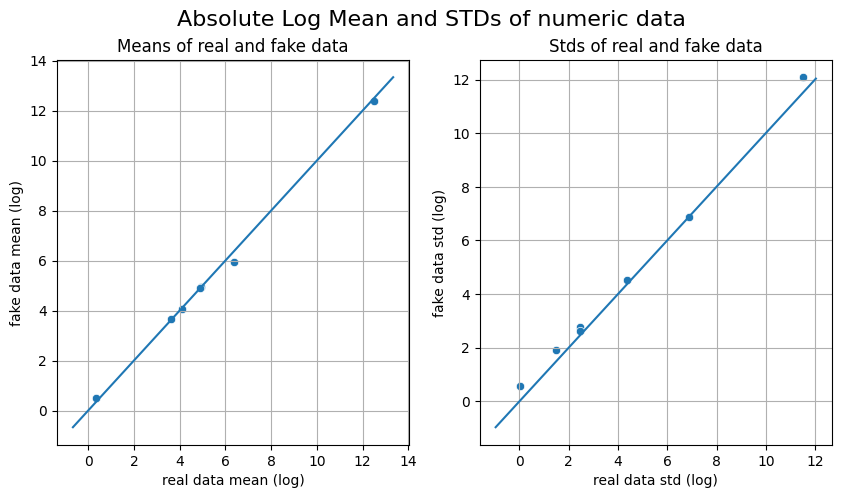

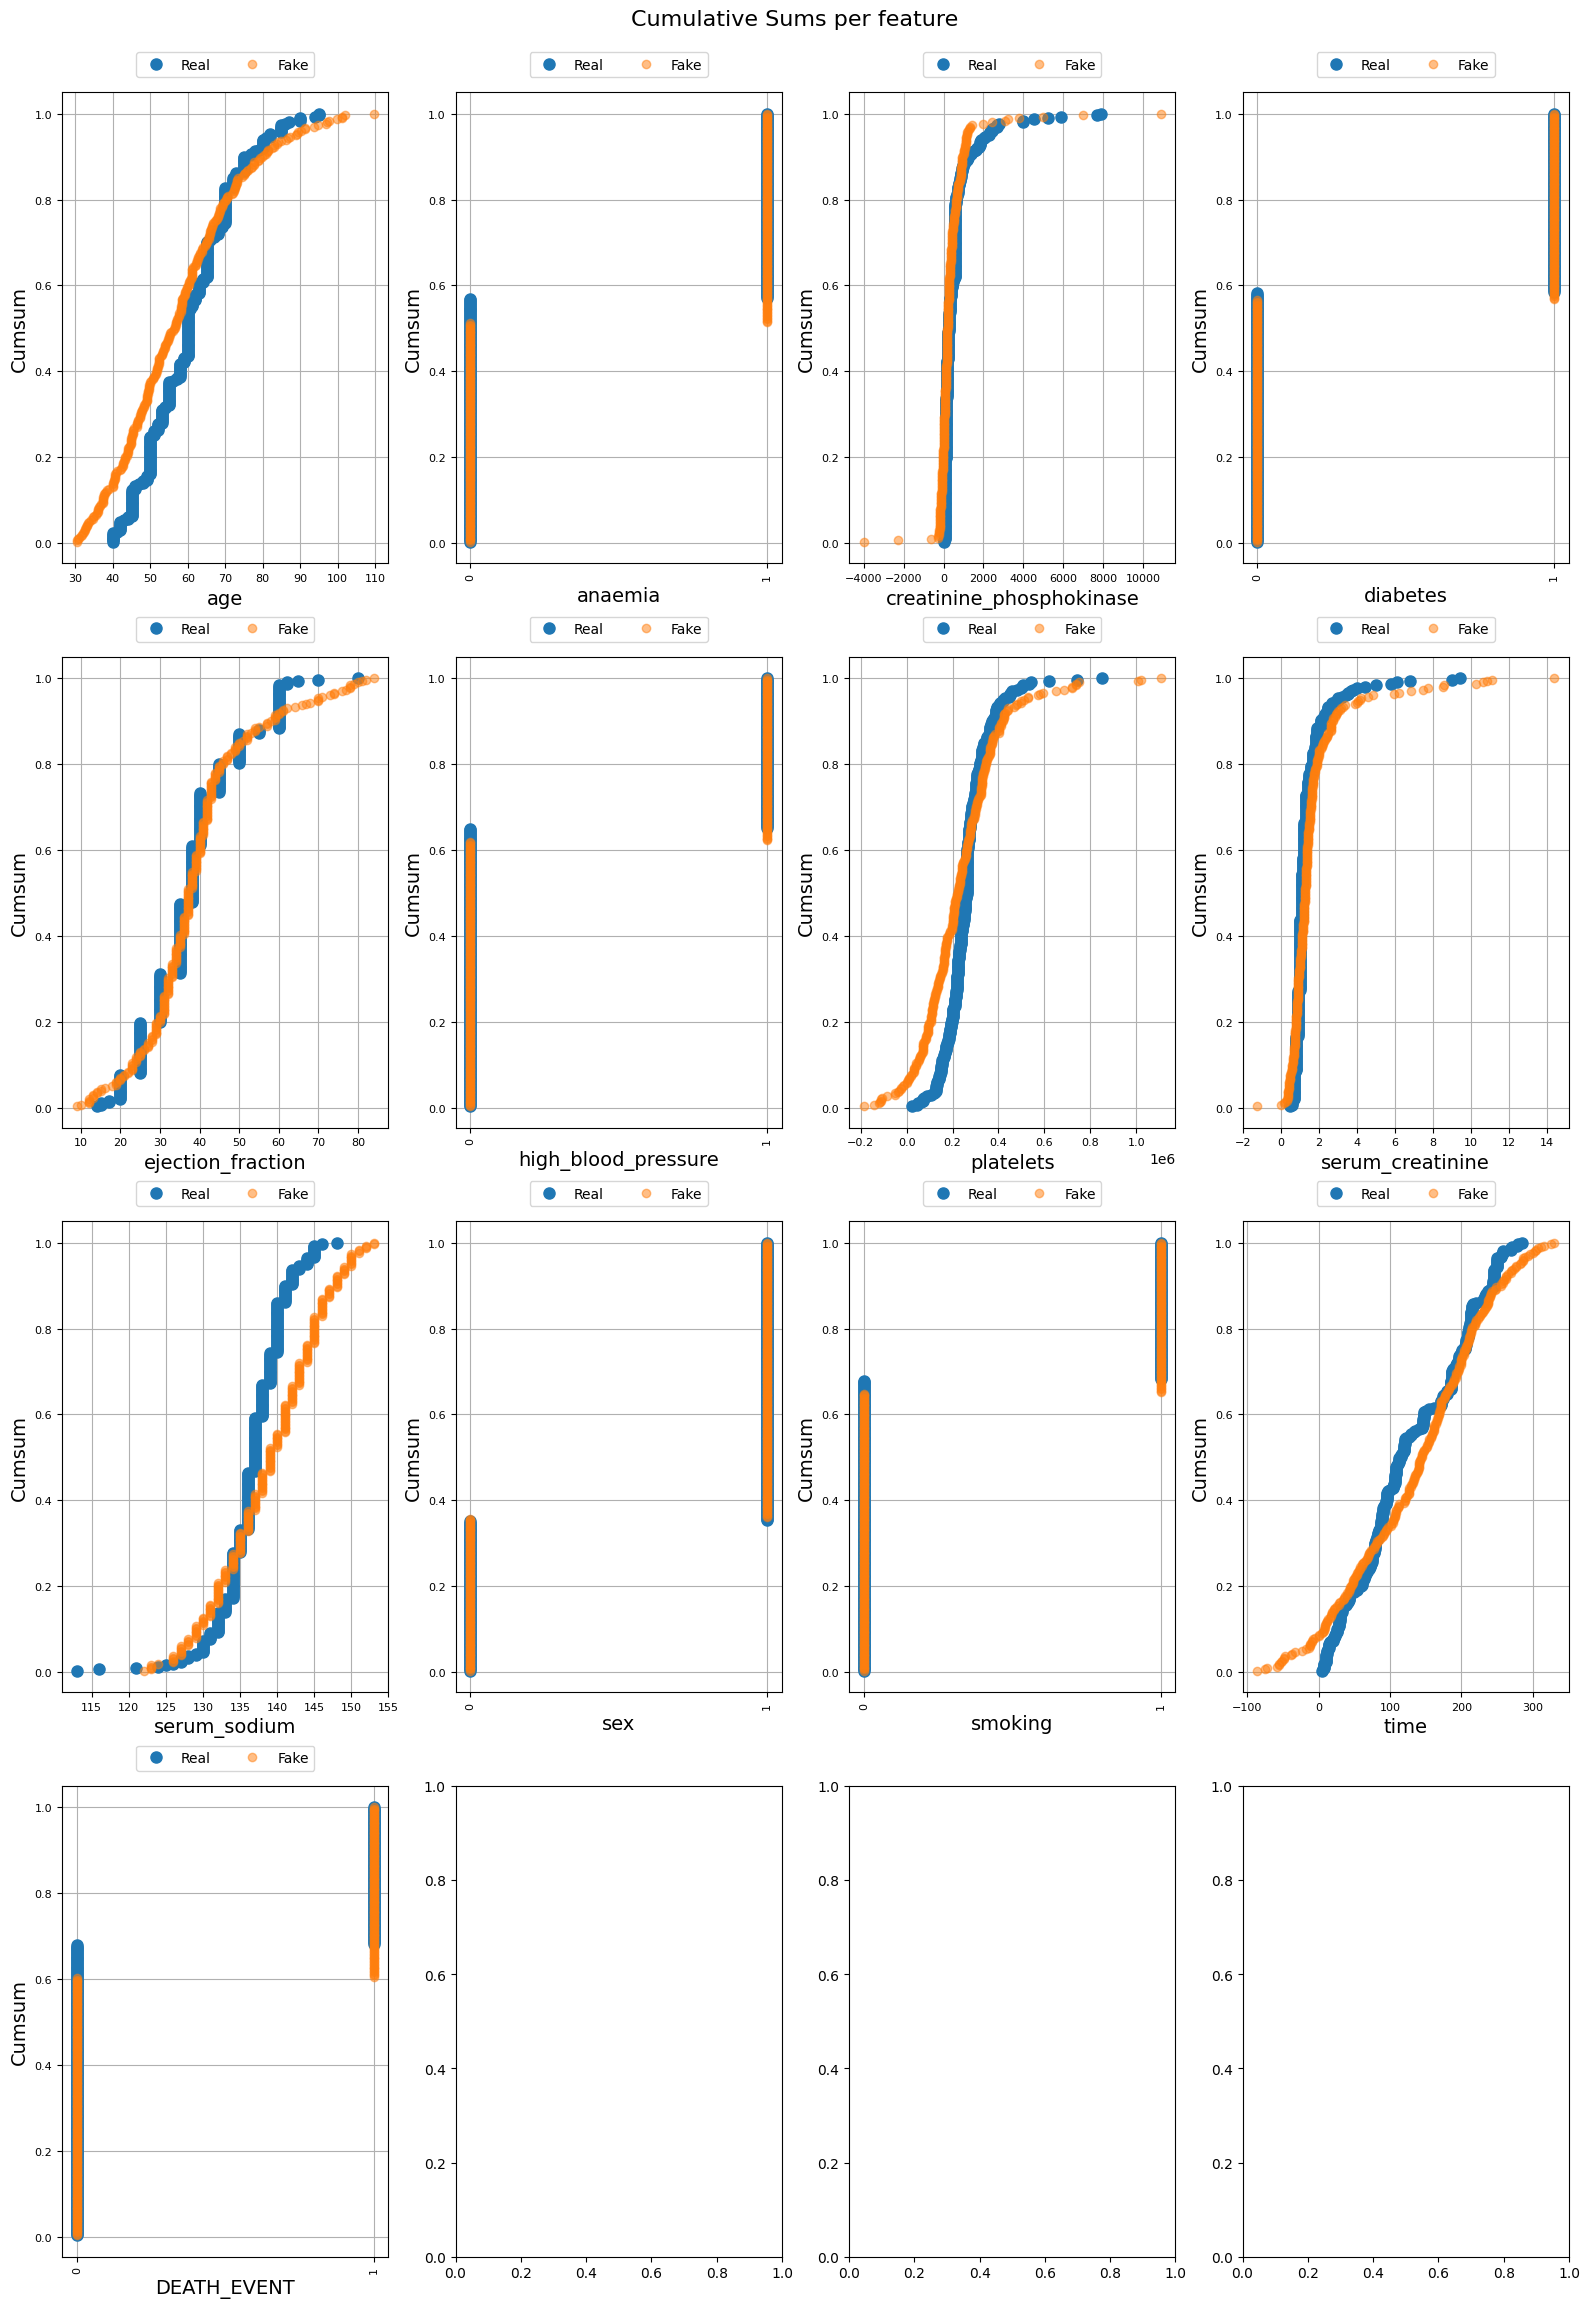

C:\Users\stajyer\anaconda3\envs\glioma\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\stajyer\anaconda3\envs\glioma\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\stajyer\anaconda3\envs\glioma\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\stajyer\anaconda3\envs\glioma\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\stajyer\anaconda3\envs\glio

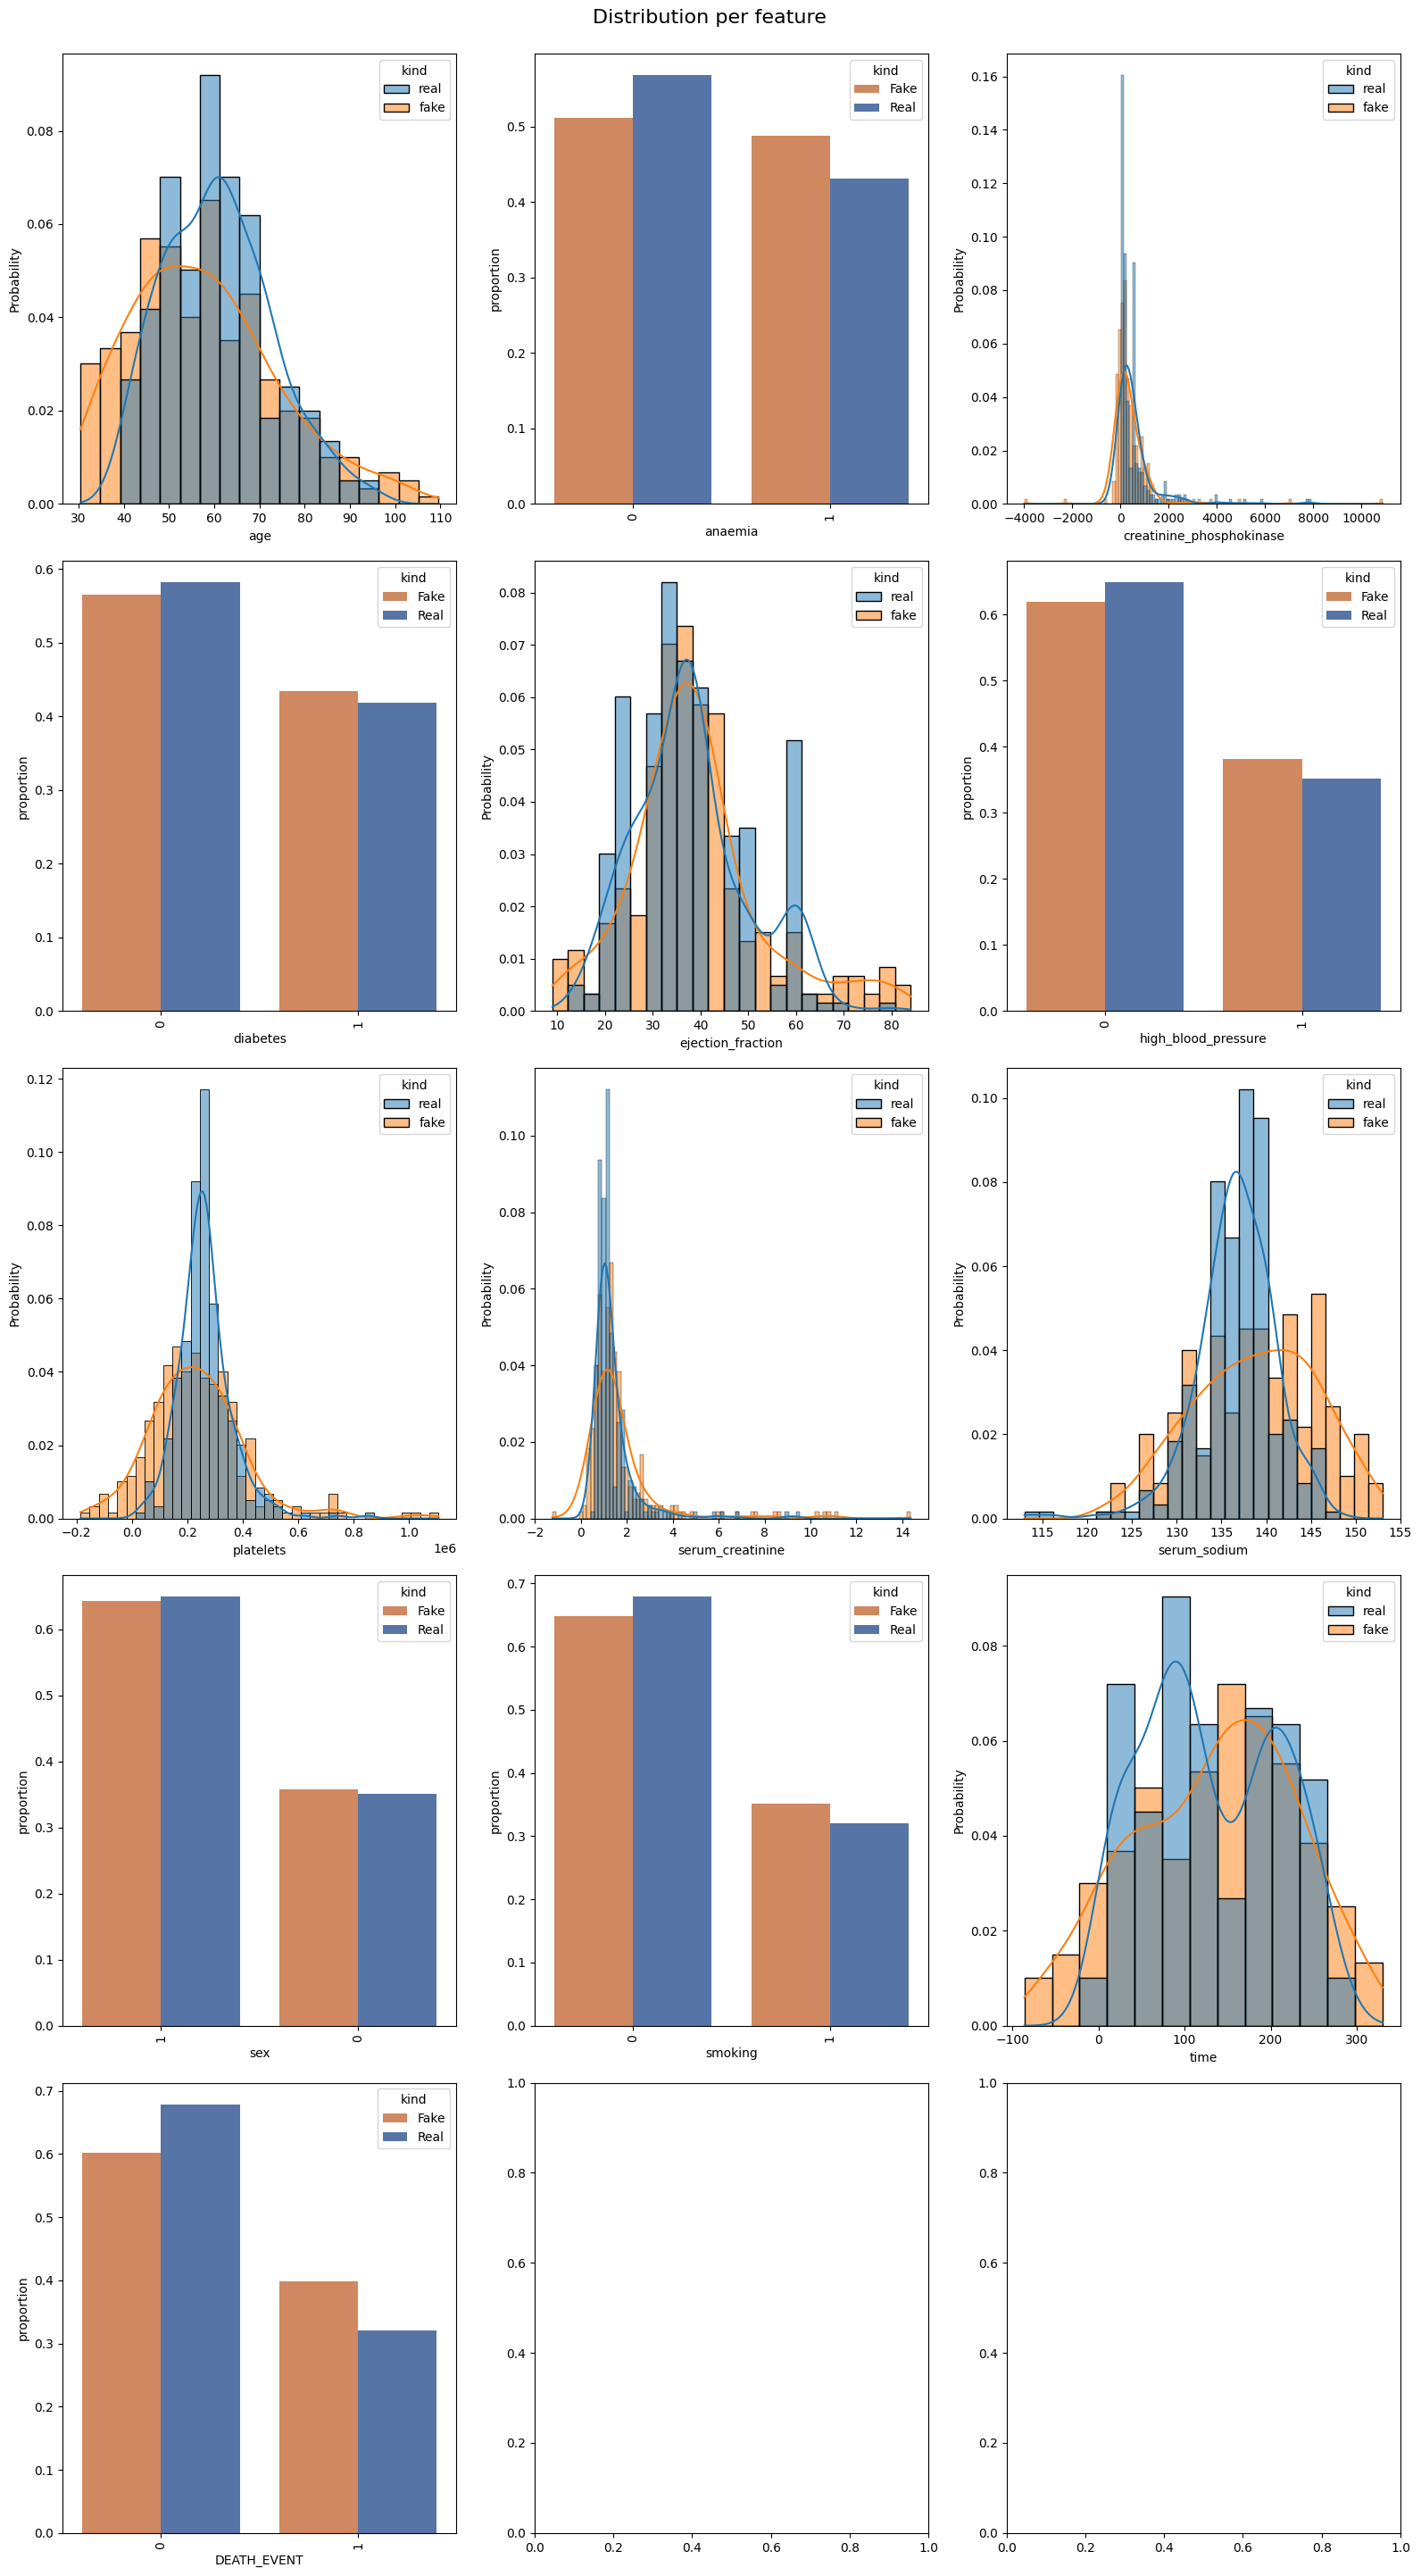

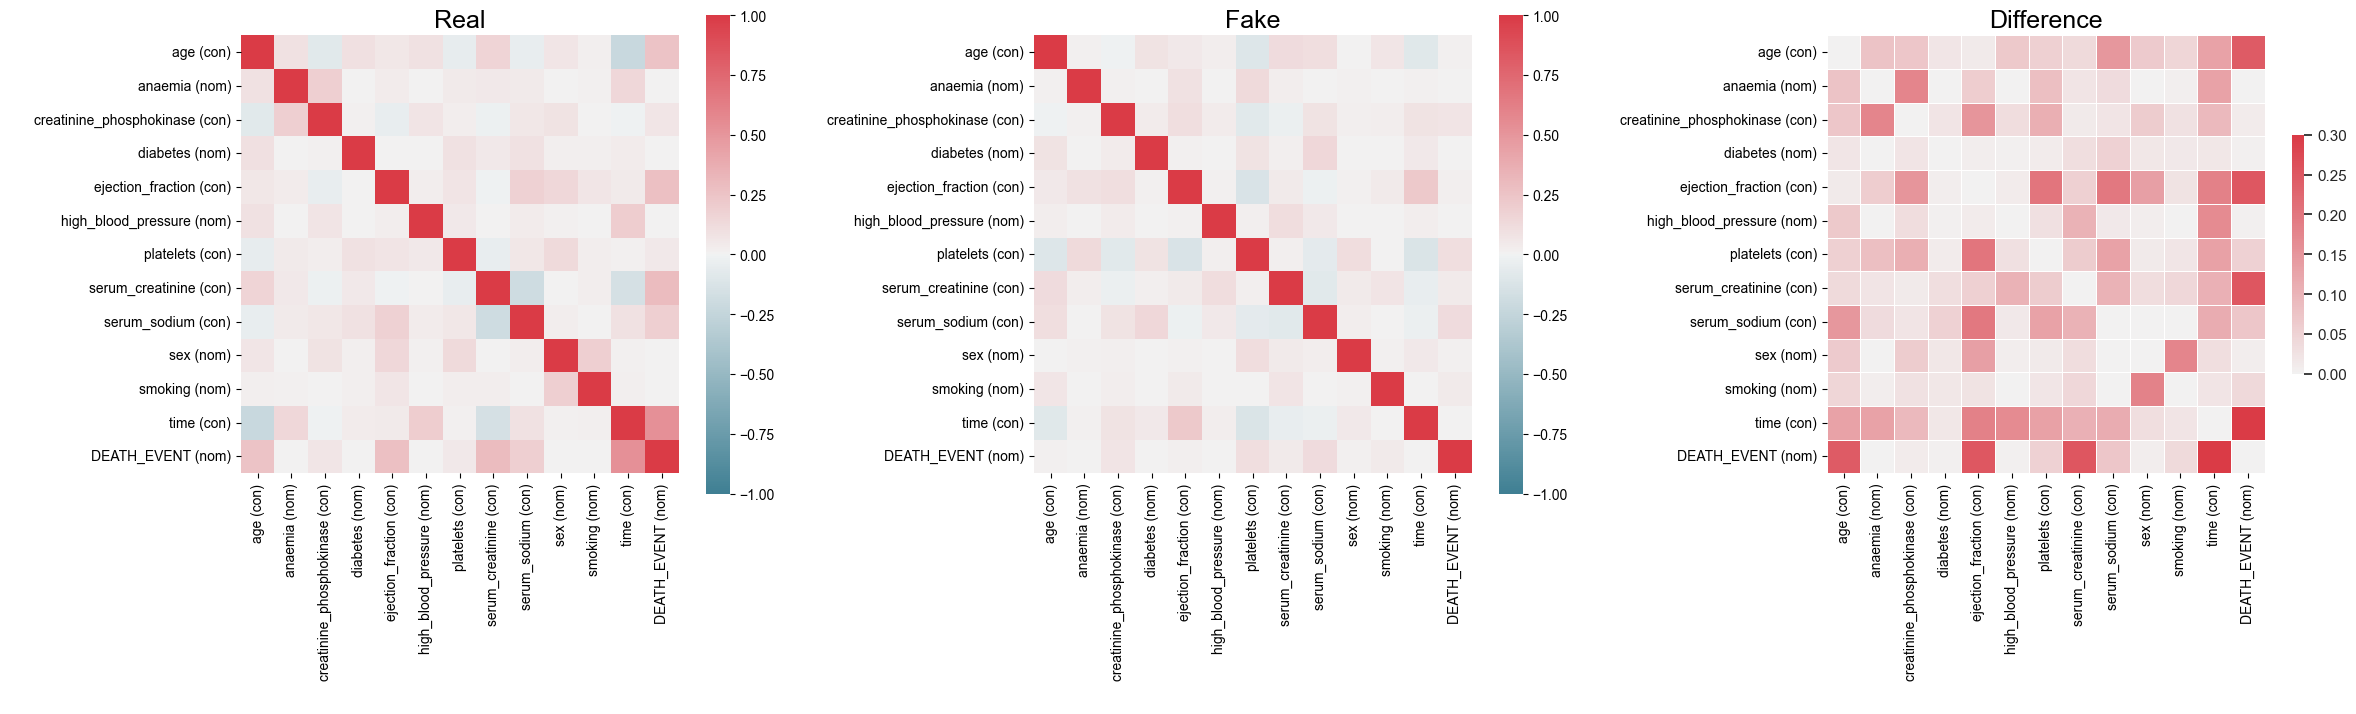

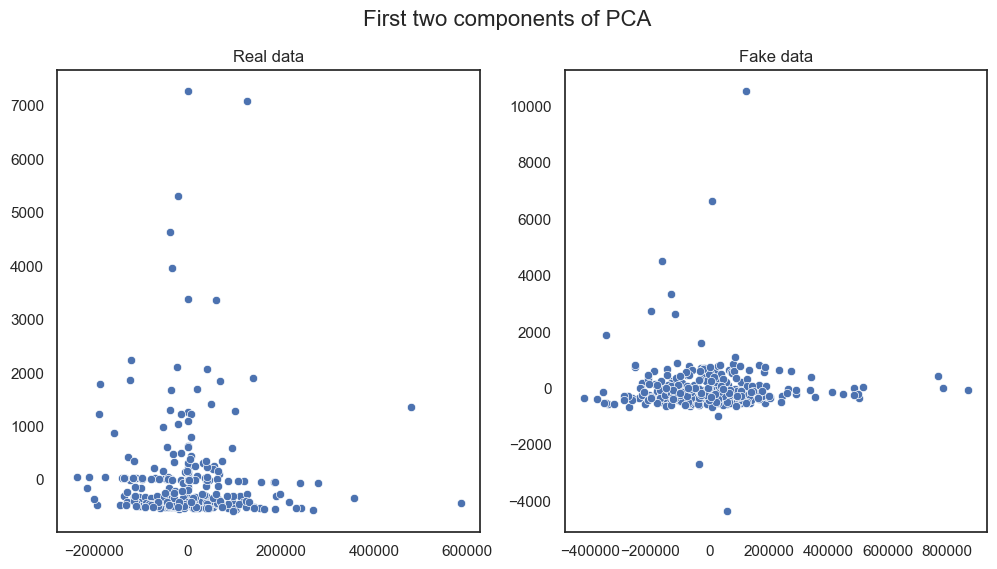

In [10]:
table_evaluator = TableEvaluator(real_data, synthetic_data, cat_cols = discrete_columns)
table_evaluator.visual_evaluation()

In [11]:
from pycaret.classification import *

In [12]:
s = setup(data=synthetic_data, target = 'DEATH_EVENT', test_data=real_data, index=False, session_id = 123)

,Description,Value
0,Session id,123
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(598, 13)"
4,Transformed data shape,"(598, 13)"
5,Transformed train set shape,"(299, 13)"
6,Transformed test set shape,"(299, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [13]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6085,0.6021,0.4030,0.5014,0.4395,0.1496,0.1536,0.0240
dummy,Dummy Classifier,0.6021,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0040
rf,Random Forest Classifier,0.5922,0.5877,0.2947,0.5052,0.3548,0.0898,0.1036,0.0320
lr,Logistic Regression,0.5918,0.5950,0.2689,0.4932,0.3440,0.0816,0.0934,0.3010
dt,Decision Tree Classifier,0.5916,0.5716,0.4765,0.4991,0.4775,0.1456,0.1501,0.0050
gbc,Gradient Boosting Classifier,0.5889,0.5590,0.3447,0.4485,0.3802,0.0955,0.0922,0.0210
ada,Ada Boost Classifier,0.5852,0.5407,0.3856,0.4696,0.4145,0.1035,0.1063,0.0160
ridge,Ridge Classifier,0.5849,0.6074,0.3447,0.4581,0.3844,0.0914,0.0915,0.0050
lda,Linear Discriminant Analysis,0.5816,0.6084,0.3530,0.4508,0.3880,0.0876,0.0867,0.0050
nb,Naive Bayes,0.5785,0.5090,0.1015,0.4200,0.1541,-0.0033,0.0127,0.0060


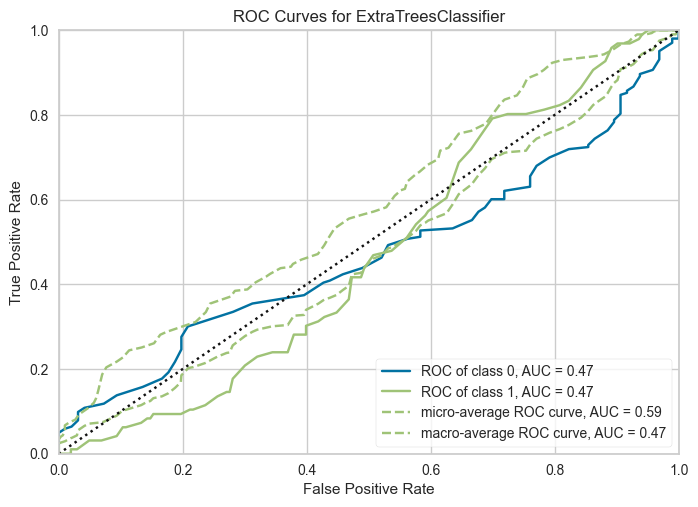

In [14]:
plot_model(best, plot = 'auc')

In [15]:
s = setup(real_data, target = 'DEATH_EVENT', session_id = 123)

,Description,Value
0,Session id,123
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(299, 13)"
4,Transformed data shape,"(299, 13)"
5,Transformed train set shape,"(209, 13)"
6,Transformed test set shape,"(90, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [16]:
# functional API
best_real = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8181,0.9258,0.6595,0.7976,0.6804,0.5635,0.5916,0.0390
et,Extra Trees Classifier,0.8088,0.8891,0.5548,0.8342,0.6383,0.5214,0.5524,0.0300
lightgbm,Light Gradient Boosting Machine,0.8040,0.8649,0.6119,0.7621,0.6562,0.5247,0.5465,0.0470
gbc,Gradient Boosting Classifier,0.7990,0.8702,0.6143,0.7835,0.6444,0.5138,0.5482,0.0250
lr,Logistic Regression,0.7902,0.8823,0.6310,0.7429,0.6597,0.5125,0.5332,0.0220
lda,Linear Discriminant Analysis,0.7855,0.8719,0.6310,0.7076,0.6519,0.5013,0.5137,0.0080
nb,Naive Bayes,0.7805,0.8355,0.4976,0.7083,0.5642,0.4393,0.4596,0.0080
ada,Ada Boost Classifier,0.7802,0.8264,0.5833,0.7251,0.6302,0.4778,0.4938,0.0210
ridge,Ridge Classifier,0.7712,0.8729,0.5857,0.6976,0.6190,0.4608,0.4771,0.0080
dt,Decision Tree Classifier,0.7557,0.7236,0.6381,0.6218,0.6204,0.4417,0.4499,0.0080


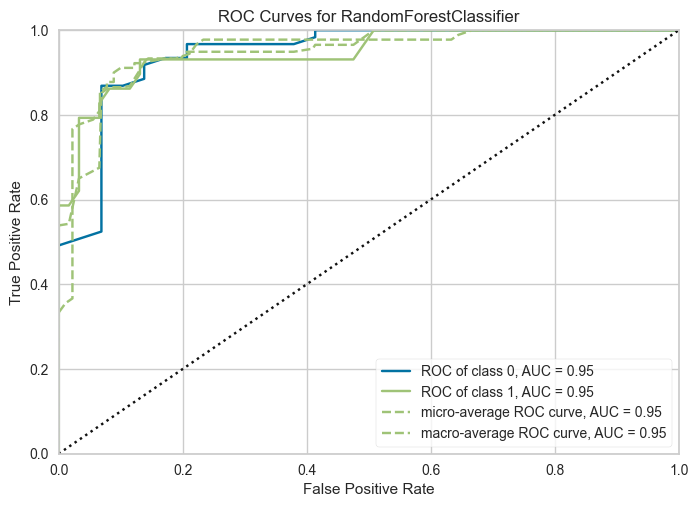

In [17]:
plot_model(best_real, plot = 'auc')